# Dataset

This analysis explores the PEPFAR Supply Chain Management System (SCMS) Delivery History dataset to extract insights beneficial for stakeholders in making informed data-driven decisions.

The US President's Emergency Plan for AIDS Relief(PEPFAR) since its inception has focused on HIV/AIDS reponse globally making HIV prevention and treatment services more accessible and equitable to supported countries.

Each record in the dataset represents the shipments of anti-retroviral drugs and rapid test kits to specific countries. However, it is important to acknowledge that there are some missing data on the cost of freight and/or insurance for specific orders for deliveries.

# Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read data file
df = pd.read_csv('SCMS_Delivery_History.csv')

In [3]:
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                        240               1000          6200.0       6.20   
2                        100                500         40000.0      80.00   
3                         60              31920        127360.8       3.99   
4                         60              38000        121600.0       3.20   

  Unit Price             Manufacturing Site First Line Designation  \
0       0.97     Ranbaxy Fine Chemicals LTD                    Yes   
1       0.03      Aurobindo Unit III, India                    Yes   
2       0.80  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       0.07  Ranbaxy, Paonta Shahib, India                    Yes   
4       0.05      Aurobindo Unit III, India                    Yes   

  Weight (Kilograms) Freight Cost (USD) Line Item Insurance (USD)  
0                 13             780.34                       NaN  
1                358             4521.5                       NaN  
2                171            1653.78                       NaN  
3               1855           16007.06                       NaN  
4               7590           45450.08                       NaN  

[5 rows x 33 columns]

In [4]:
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [5]:
# Check data types
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [7]:
# Check for missing values
df1 = df.isna().sum()
df1

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [8]:
print(df.describe())

                 ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000    

In [9]:
# Numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['ID', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price',
       'Line Item Insurance (USD)'],
      dtype='object')

In [10]:
# Drop columns irrelevant tog analysis
df.drop(['PO / SO #','ASN/DN #','PQ #'],axis=1,inplace=True)

In [11]:
unique_countries = df['Country'].nunique()

# Display the count of unique countries
print("Number of Unique Countries:", unique_countries)

Number of Unique Countries: 43


In [12]:
country_counts = df['Country'].value_counts()

# Display the count of countries
print("Country Counts:")
print(country_counts)

Country Counts:
South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo        

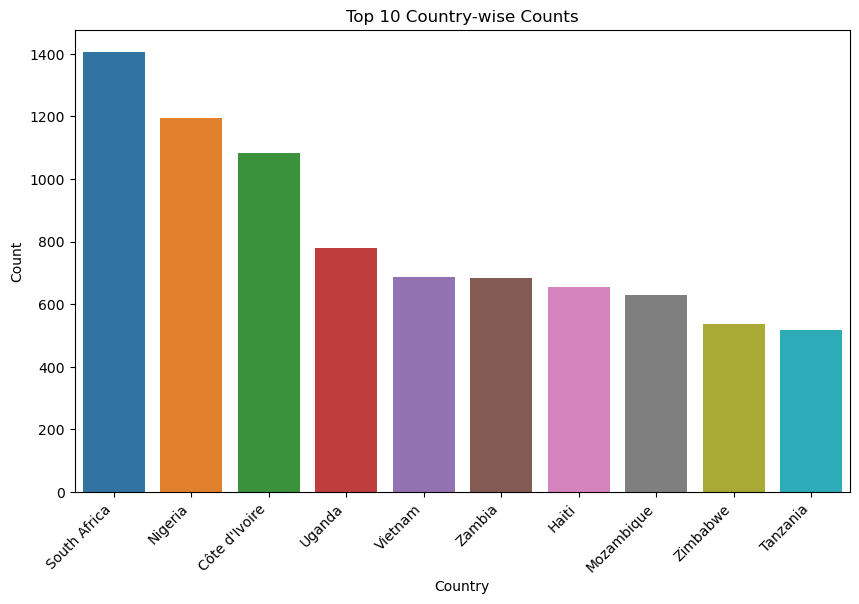

In [13]:
# Count records for each country
country_counts = df['Country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Country-wise Counts')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

The visualization presented focuses on the top 10 countries in the dataset, ranked by the number of records. Notably there is a concentration of records related to African countries. Specifically, South Africa, Nigeria, and Côte d'Ivoire being the three countries with the highest frequency of records. This is because the majority of PEPFAR supported countries are African countries.

In [14]:
# Create a geographical plot
fig = px.choropleth(df, 
                    locations='Country', 
                    locationmode='country names',
                    color='Line Item Quantity', 
                    title='Distribution Across Different Countries',
                    color_continuous_scale="Viridis")
fig.show()

The color intensity represents the magnitude of the values, allowing us to visually compare the distribution of quantities across different countries.

# Analyze Supply Chain

We want to analyze the supply chain and understand more about the distribution of products.

#### Product Group Distribution

In [15]:
# Count records for each product group
product_group_counts = df['Product Group'].value_counts()
product_group_counts

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

An exploration of the product group distribution in the dataset honed in on the five product groups: ARV, HRDT, ANTM, ACT, and MRDT. To visually represent this distribution, a pie chart was used, showcasing the proportions of each product group within the dataset. The resulting pie chart vividly illustrates that ARV dominates the dataset, constituting an overwhelming 82.8% of the records. HRDT follows with a notable share of 16.7%. The remaining product groups, namely ANTM, ACT, and MRDT, collectively account for a smaller fraction, representing less than 1%.

This distribution analysis provides valuable insights into the prevalence of the different product groups, laying the groundwork for further exploration of specific product categories within the supply chain.

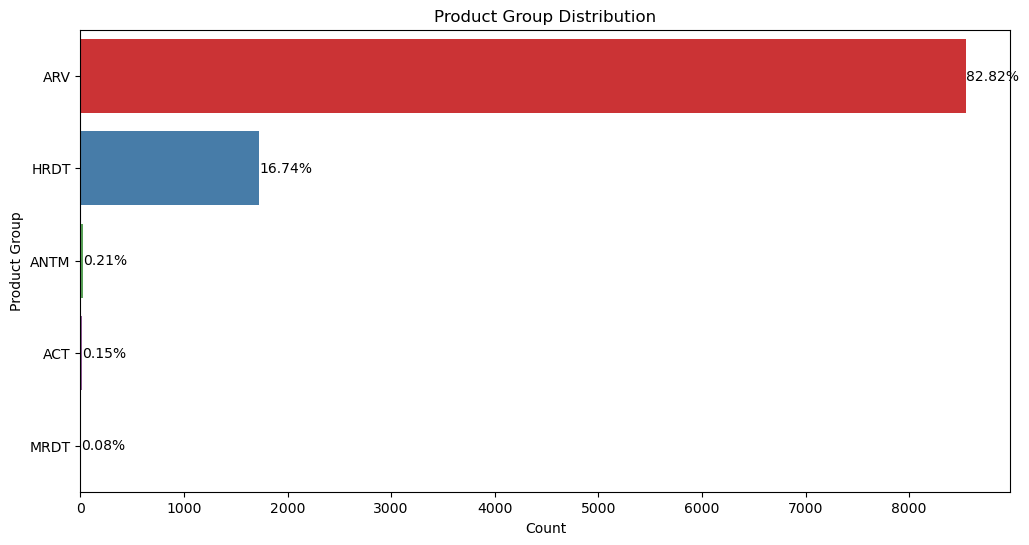

In [16]:
# Count records for each product group
product_group_counts = df['Product Group'].value_counts()

# Plotting as a horizontal bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(y=product_group_counts.index, x=product_group_counts.values, palette="Set1")
plt.title('Product Group Distribution')
plt.xlabel('Count')
plt.ylabel('Product Group')

# Add percentage labels to the bars
for index, value in enumerate(product_group_counts.values):
    bar_plot.text(value, index, f'{(value/sum(product_group_counts.values))*100:.2f}%', ha='left', va='center')

plt.show()

#### Sub Classification Distribution

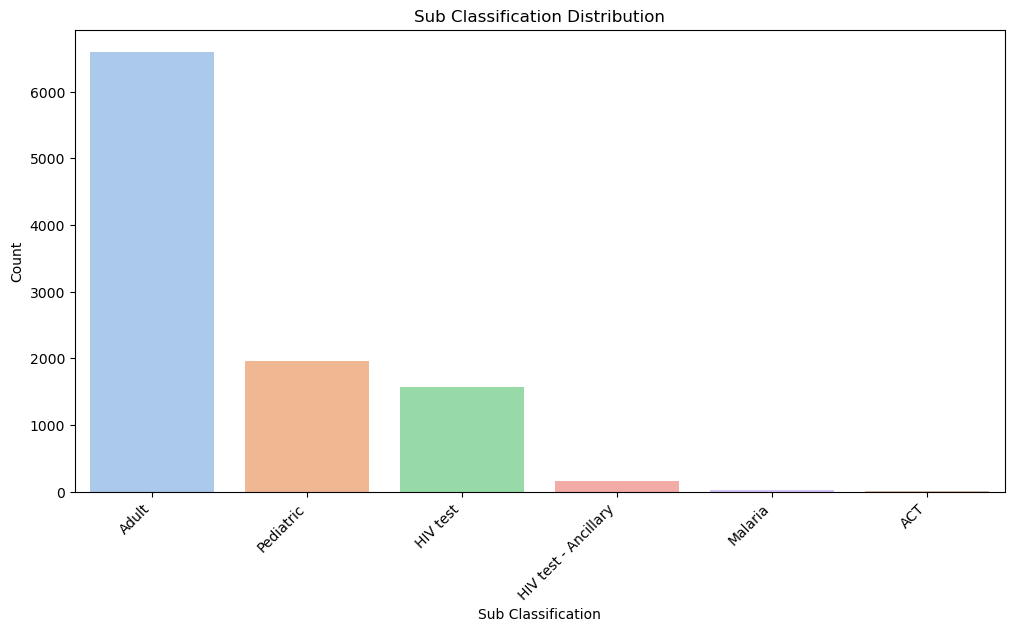

In [17]:
# Count records for each sub classification
sub_classification_counts = df['Sub Classification'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=sub_classification_counts.index, y=sub_classification_counts.values, palette="pastel")
plt.title('Sub Classification Distribution')
plt.xlabel('Sub Classification')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

The above visualization identifies relevant product sub classifications, such as whether ARVs are pediatric or adult, whether a malaria product is an artemisinin-based combination therapy (ACT), etc.

#### Supply Chain Fulfillment

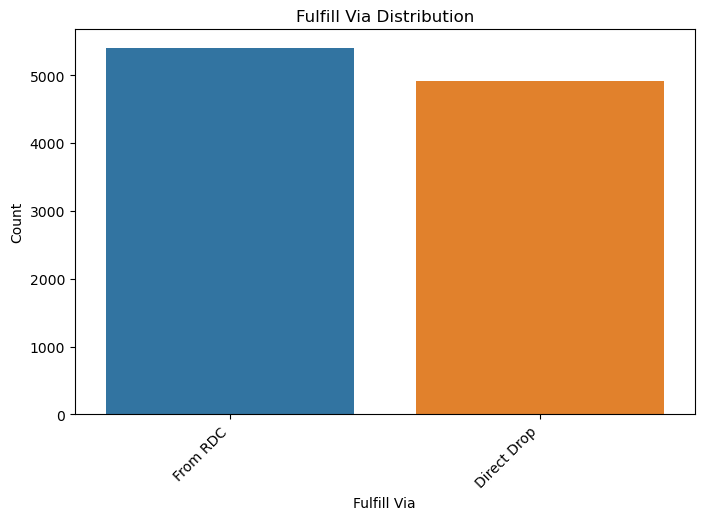

In [18]:
# Count records for each "Fulfill Via" category
fulfill_via_counts = df['Fulfill Via'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=fulfill_via_counts.index, y=fulfill_via_counts.values)
plt.title('Fulfill Via Distribution')
plt.xlabel('Fulfill Via')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

There were slightly more stocks distributed from the Regional Distribution Centers(RDCs) than there was from direct drop.

#### Shipment Mode Distribution

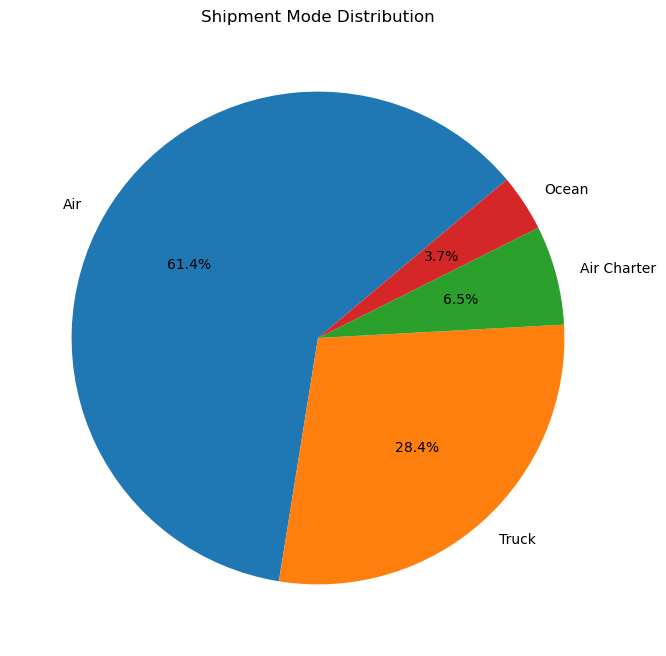

In [19]:
# Count records for Shipment Mode
shipment = df['Shipment Mode'].value_counts()

#Pie
plt.figure(figsize=(8, 8))
plt.pie(shipment, labels = shipment.index, autopct = '%1.1f%%', startangle = 40)
plt.title('Shipment Mode Distribution')
plt.show()

In the analysis of the procurement and delivery process, we examined the shipment modes utilized for the transportation of goods. The data revealed that Air shipment was the most frequently employed mode, accounting for a significant portion of the shipments. This indicates a preference for expedited delivery, highlighting the importance of timely transportation in meeting demands. Other shipment modes, such as Truck and Ocean were also observed but to a lesser extent. The dominance of Air shipment suggests a focus on efficiency and responsiveness in the supply chain operations, ensuring prompt delivery of the critical products in this regard.

Typically, for a profit organization, it will be crucial to monitor and optimize the shipment modes to maintain a balance between cost-effectiveness and meeting delivery timelines.

## Feature Engineering: Lead Time Analysis

In [27]:
# Calculate lead time between stages

# Replace objects types Date Not Captured and N/A - From RDC with NaN
df = df.replace(["Date Not Captured", "N/A - From RDC"], np.nan)

# Convert date columns to datetime
df['PQ First Sent to Client Date'] = pd.to_datetime(df['PQ First Sent to Client Date'], errors='coerce')
df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'], errors='coerce')
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')

# Calculate lead time between stages
df['PQ_to_PO'] = df['PO Sent to Vendor Date'] - df['PQ First Sent to Client Date']
df['PO_to_Scheduled'] = df['Scheduled Delivery Date'] - df['PO Sent to Vendor Date']
df['Scheduled_to_Delivered'] = df['Delivered to Client Date'] - df['Scheduled Delivery Date']

# Print the DataFrame with the calculated lead times
# print(df[['PQ_to_PO', 'PO_to_Scheduled', 'Scheduled_to_Delivered']])

In [26]:
# Display lead time statistics
lead_time_columns = ['PQ to PO Lead Time', 'PO to Scheduled Delivery Lead Time', 'Scheduled Delivery to Delivered Lead Time']
print(df[lead_time_columns].describe())

       PQ to PO Lead Time  PO to Scheduled Delivery Lead Time  \
count         3842.000000                         4592.000000   
mean            54.485164                          105.742596   
std             89.614471                           78.027811   
min           -224.000000                         -160.000000   
25%             14.000000                           52.000000   
50%             24.000000                           92.000000   
75%             49.000000                          142.000000   
max            414.000000                          616.000000   

       Scheduled Delivery to Delivered Lead Time  
count                               10324.000000  
mean                                   -6.023537  
std                                    27.233640  
min                                  -372.000000  
25%                                    -3.000000  
50%                                     0.000000  
75%                                     0.000000  
max   

- **Handling Missing Values in Lead Time Analysis:**

For the lead time analysis, I handled missing values in the relevant columns under consideration by replacing certain strings ("Date Not Captured" and "N/A - From RDC") with NaN.
These replacements were made to treat non-numeric entries as missing values to allow further analysis.

- **Lead Time Calculations:**

Lead times between different stages of the procurement process were calculated, and the results include NaN values where lead times could not be computed due to missing dates as mentioned above.

- **Pre-Quotation to Purchase Order(PQ to PO) Lead Time:**
The result indicates the number of days between sending the Purchase Quotation to the client and sending the Purchase Order to the vendor.

There are 3,842 valid values available for this lead time calculation.
The average PQ to PO lead time is approximately 54 days.
There is a relatively high variability in lead times with a standard deviation of approximately 90 days.
The 25th percentile (Q1) is 14 days, meaning that 25% of the lead times fall below this value.
The median (50th percentile) is 24 days, indicating that half of the lead times are below this value.
The 75th percentile (Q3) is 49 days, meaning that 75% of the lead times fall below this value.
The maximum lead time is 414 days, signifying the longest time observed between PQ and PO stages.

The minimum lead time is -224 days, which suggests that in some cases, the purchase order (PO) was sent to the vendor before the PQ (PQ First Sent to Client Date).
In a typical procurement process, the PQ stage would precede the PO stage. The PQ represents the initial step of sending a request or proposal to the client, while the PO stage involves sending the actual purchase order to the vendor. Therefore, the PQ to PO lead time should generally be a positive value, indicating the time it takes for the client to respond and generate the purchase order. A negative lead time, such as -224 days, does not align with the typical procurement workflow.

A negative lead time could occur due to various reasons, such as **data entry errors**, **data inconsistencies/system glitches**, **issues with the underlying business process or time zone difference**. In this case, it's important to investigate the specific cases with negative lead times to determine the cause and rectify any potential data issues.

- Possible reasons for such discrepancies could include:

**Data Entry Errors:** Mistakes in entering dates or recording information can lead to incorrect results.

**System Glitches:** Technical issues or glitches in the procurement system could cause incorrect calculations or display of dates.

**Unusual Workflow:** In some unique cases, a company might have an unconventional procurement process where a PO is generated before the formal approval of the PQ, but this is uncommon and not recommended due to the risks involved.

**Different Time Zones:** If the dates are recorded in different time zones without proper conversion, it could lead to apparent discrepancies.



In [28]:
zero_timedelta = pd.Timedelta(0)

# Select rows where 'PQ_to_PO' is negative
negative_lead_time_rows = df[df['PQ_to_PO'] < zero_timedelta]

# Print the rows of the selected columns for cases where 'PQ_to_PO' is negative
print(negative_lead_time_rows[['PQ_to_PO']])

      PQ_to_PO
3816  -96 days
4358 -108 days
5686  -37 days
5753 -224 days
6001  -96 days


The above code helps us to identify instances where the purchase order was sent to the vendor before the PQ stage. The output provides a clear representation of the negative lead times, offering insights into instances where the standard procurement sequence may have been disrupted or where data inconsistencies may exist. Further investigation can be taken to provide insight in these cases.


- **PO to Scheduled Delivery Lead Time:**

There are 4,592 valid values available to analyze this process.
The mean average PO to Scheduled Delivery lead time is approximately 105.74 days. The lead times in this stage also show variability, with a standard deviation of approximately 78.03 days also suggesting that certain cases may experience delays. Lead times range from a minimum of -160 days to a maximum of 616 days.


- **Scheduled Delivery to Delivered Lead Time:**

Records fpr this stage was captured completely with a total of 10,324 valid values.The average lead time from Scheduled Delivery to actual delivery is approximately -6.02 days. A negative lead time might indicate that delivery often occurs before the scheduled delivery date. The lead times in this stage show less variability compared to the other stages, with a standard deviation of approximately 27.23 days with lead times ranging from a minimum of -372 days to a maximum of 192 days.


### Visualize Procurement Timeline using Gantt Chart

In [29]:
# Create Gantt Chart
import plotly.express as px


fig = px.timeline(df, x_start='PQ First Sent to Client Date', x_end='Delivered to Client Date', y='Project Code',
                  labels={'Project Code': 'Project'},
                  title='Procurement Timeline',
                  category_orders={'Project Code': sorted(df['Project Code'].unique())},
                  height=800)

fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(xaxis_title='Timeline', yaxis_title='Project Code', coloraxis=dict(colorscale="Viridis"))


fig.show()

The Gantt chart provides a visual representation of the procurement timeline, showing the start and end dates of different stages of the process. The x-axis represents the timeline in year, and each project timeline is shown as a separate horizontal bar, with the length of the bar indicating the duration of the timeline.

In [30]:
# Delivered to Client Date and PQ First Sent to Client Date are datetime columns
df['Project Duration'] = (df['Delivered to Client Date'] - df['PQ First Sent to Client Date']).dt.days

# Find the index of the project with the longest duration
longest_duration_index = df['Project Duration'].idxmax()

# Retrieve the project code and duration for the project with the longest duration
longest_duration_project_code = df.loc[longest_duration_index, 'Project Code']
longest_duration_days = df.loc[longest_duration_index, 'Project Duration']

print(f"Project with the longest duration: {longest_duration_project_code}, {longest_duration_days} days")


Project with the longest duration: 104-CI-T30, 706.0 days


In [31]:
# Calculate Procurement duration
df['Duration'] = df['Delivered to Client Date'] - df['PQ First Sent to Client Date']
df['Duration (Months)'] = df['Duration'] / np.timedelta64(1, 'M')
df['Duration (Days)'] = df['Duration'].dt.days

# Find the project with the longest duration
max_duration_project_row = df.loc[df['Duration (Days)'].idxmax()]

# Create a DataFrame with the result
result_df = pd.DataFrame({
    'Project Code': [max_duration_project_row['Project Code']],
    'Duration (Months)': [max_duration_project_row['Duration (Months)']],
    'Duration (Days)': [max_duration_project_row['Duration (Days)']]
})

# Display the entire row
max_duration_row = df.loc[df['Duration (Days)'].idxmax()]

print("Full Row:")
print(max_duration_row)
print("\nResult:")
print(result_df)

Full Row:
ID                                                                       83832
Project Code                                                        104-CI-T30
Country                                                          Côte d'Ivoire
Managed By                                                            PMO - US
Fulfill Via                                                           From RDC
Vendor INCO Term                                                           NaN
Shipment Mode                                                            Truck
PQ First Sent to Client Date                               2012-09-11 00:00:00
PO Sent to Vendor Date                                                     NaT
Scheduled Delivery Date                                    2014-08-29 00:00:00
Delivered to Client Date                                   2014-08-18 00:00:00
Delivery Recorded Date                                                5-Sep-14
Product Group                             

Probing further in the analysis of procurement process, project code 104-CI-T30 stands out with an exceptionally lengthy timeline. The project, identified by ID 83832, was initiated with the PQ process on September 11, 2012. Despite the scheduled delivery date of August 29, 2014, the actual delivery to the client occurred on August 18, 2014, which is 11 days earlier than planned. It involved the procurement of Efavirenz 600mg tablets, totaling 30 tabs per pack, with a quantity of 29,804 packs. The project was carried out in Côte d'Ivoire and managed by the PMO - US. The fulfillment was done via RDC (Regional Distribution Center), and the shipment mode was by truck. The duration of this project is noteworthy, spanning 706 days or approximately 23.2 months, making it the project with the longest timeline in the dataset. The extended timeline may have been influenced by factors such as lead times, shipment modes, and unforeseen delays. However, delivery occured earlier than planned which is a positive outcome. This intricate duration, which incorporates both positive and negative aspects, exemplifies the complexities that can arise in real-world procurement processes. Further investigation into the specifics of this project's timeline and delivery process could provide insights into optimizing future procurement management strategies.

In [32]:
# Convert 'Freight Cost (USD)' to numeric
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')


# Time Series Analysis

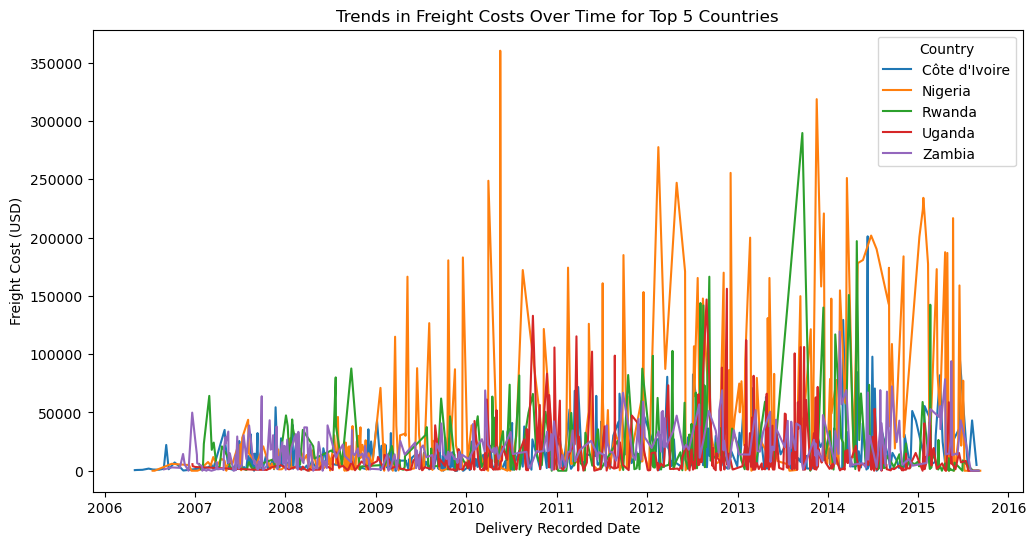

In [33]:
# Convert 'Delivery Recorded Date' to datetime
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'], errors='coerce')

# Group by Country and sum the Freight Cost (USD) for each date
country_freight_costs = df.groupby(['Country', 'Delivery Recorded Date'])['Freight Cost (USD)'].sum().reset_index()

# Get the top 5 countries by total freight cost
top_countries = country_freight_costs.groupby('Country')['Freight Cost (USD)'].sum().nlargest(5).index

# Filter the DataFrame for the top 5 countries
top_countries_df = country_freight_costs[country_freight_costs['Country'].isin(top_countries)]

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Delivery Recorded Date', y='Freight Cost (USD)', hue='Country', data=top_countries_df)
plt.title('Trends in Freight Costs Over Time for Top 5 Countries')
plt.xlabel('Delivery Recorded Date')
plt.ylabel('Freight Cost (USD)')
plt.legend(title='Country')
plt.show()

The line plot visualizes the historical changes in freight costs for Nigeria, along with other countries. It depicts a notable spike in freight costs for Nigeria during specific periods in 2010, 2012, 2014. The spike indicates a substantial increase in freight expenses incurred for delivering products within these time frames.
Contextual factors, could provide valuable insights into the dynamics of the supply chain and transportation logistics in Nigeria.
Further investigation could contribute to optimizing cost-efficient freight strategies and enhancing overall procurement processes in the region.

# One-Hot Encoding and Correlation Analysis

Correlation analysis was utilized to gain insight into the relationship between selected variables and delivery time. To facilitate correlation analysis, we applied one-hot encoding to convert the categorical variables such as Shipment Mode and Fulfill Via into numerical values. We see that there is no relationship between these variables and delievery time. However, we see other high positive correlation like between line item value and line item quantity.

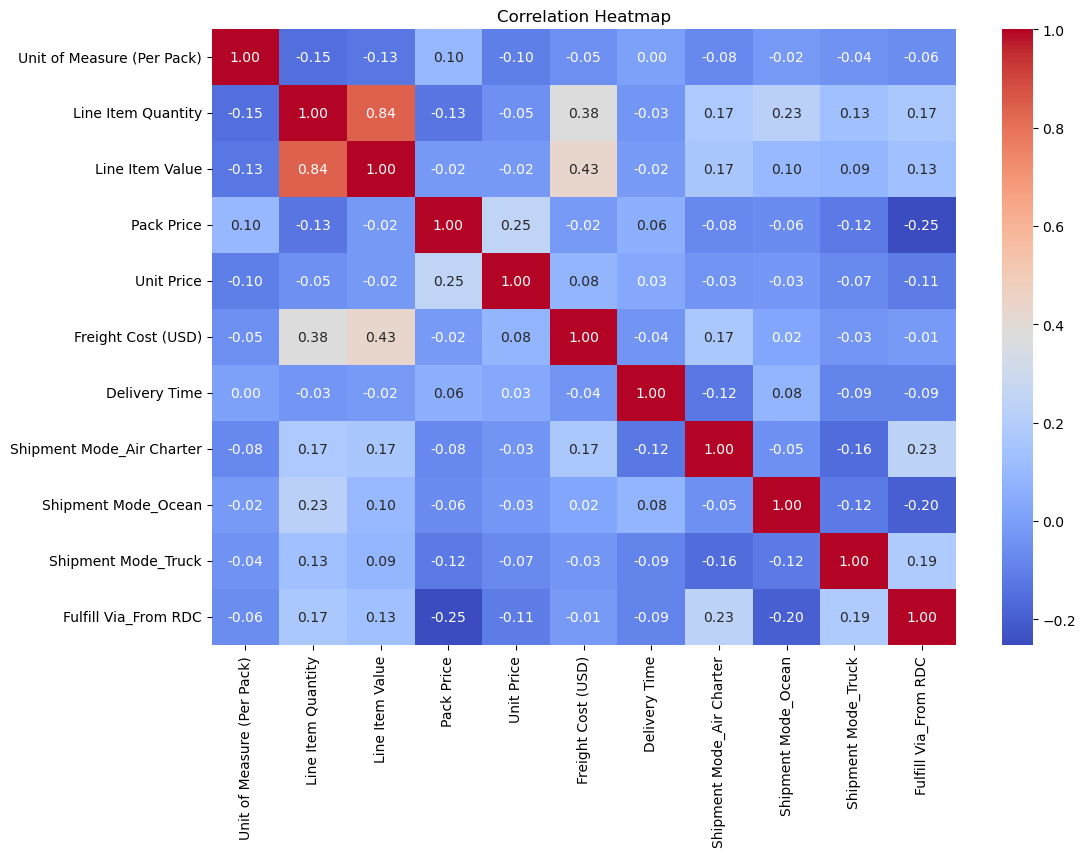

In [34]:
# Calculate delivery time
df['Delivery Time'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

# Select relevant columns for analysis
selected_columns = ['Shipment Mode', 'Fulfill Via', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Freight Cost (USD)', 'Delivery Time']
df_selected = df[selected_columns]

# Convert categorical data into numerical values using one-hot encoding
df_encoded = pd.get_dummies(df_selected, columns=['Shipment Mode', 'Fulfill Via' ], drop_first=True)

# Calculate correlation between encoded columns and 'Delivery Time'
correlation = df_encoded.corr()['Delivery Time']

# Visualize the correlation using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Predictive Modeling

### Linear Regression

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select relevant features and target variable
features = ['Shipment Mode', 'Fulfill Via', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Freight Cost (USD)']
target = 'Delivery Time'

# Subset the dataFrame with selected features and target
model_data = df[features + [target]].copy()

# Convert 'Delivery Time' to datetime
model_data['Delivery Time'] = pd.to_datetime(model_data['Delivery Time'], errors='coerce')

# Handle missing values for numerical features
numerical_features = ['Line Item Quantity', 'Line Item Value', 'Freight Cost (USD)']
numerical_imputer = SimpleImputer(strategy='mean')
model_data[numerical_features] = numerical_imputer.fit_transform(model_data[numerical_features])

# Handle missing values for datetime features
datetime_features = ['Delivery Time']
datetime_imputer = SimpleImputer(strategy='mean')
model_data[datetime_features] = datetime_imputer.fit_transform(model_data[datetime_features])

# Encode categorical variables
model_data = pd.get_dummies(model_data, drop_first=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(model_data, test_size=0.2, random_state=0)

# Separate features and target variable in training and testing sets
X_train, y_train = train_data.drop(target, axis=1), train_data[target]
X_test, y_test = test_data.drop(target, axis=1), test_data[target]

# Initialize and train a Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = regression_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 13.18
Mean Squared Error: 698.71
Root Mean Squared Error: 26.43
R-squared: 0.03


In [80]:
# Calculate delivery time
df['Delivery Time'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

# Select relevant columns for analysis
selected_columns = ['Shipment Mode', 'Fulfill Via', 'Unit of Measure (Per Pack)', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Freight Cost (USD)', 'Delivery Time']
df_selected = df[selected_columns]

# Convert categorical data into numerical values using one-hot encoding
df_encoded = pd.get_dummies(df_selected, columns=['Shipment Mode', 'Fulfill Via'], drop_first=True)


# Select features with correlation coefficient greater than 0.1 or less than -0.1
selected_features = correlation[(correlation > 0.1) | (correlation < -0.1)].index.tolist()

# Exclude target variable from selected features
selected_features.remove('Delivery Time')

# Use the selected features for linear regression
features = selected_features
target = 'Delivery Time'

# Subset the DataFrame with selected features and target
model_data = df_encoded[features + [target]].copy()

# Handle missing values for numerical features
numerical_features = features
numerical_imputer = SimpleImputer(strategy='mean')
model_data[numerical_features] = numerical_imputer.fit_transform(model_data[numerical_features])

# Encode categorical variables
model_data = pd.get_dummies(model_data, drop_first=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(model_data, test_size=0.2, random_state=0)

# Separate features and target variable in training and testing sets
X_train, y_train = train_data.drop(target, axis=1), train_data[target]
X_test, y_test = test_data.drop(target, axis=1), test_data[target]

# Initialize and train a Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = regression_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 13.31
Mean Squared Error: 711.19
Root Mean Squared Error: 26.67
R-squared: 0.01


In [81]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Update model training and testing data
regression_model.fit(X_train_scaled, y_train)
predictions = regression_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 13.31
Mean Squared Error: 711.19
Root Mean Squared Error: 26.67
R-squared: 0.01


#### Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=0)
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 5621.86
Mean Squared Error: 120319164.59
Root Mean Squared Error: 10969.01
R-squared: 0.50


In [77]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train, y_train)
predictions = dt_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Display the evaluation metrics
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 7139.56
Mean Squared Error: 226352791.11
Root Mean Squared Error: 15045.03
R-squared: 0.05


Linear regression performed exceptionally better than both random forest regressor and decision tree in predicting delivery time.

In [50]:
# Calculate the time difference between scheduled and actual delivery
df['Delivery Time'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

# Set a threshold for on-time delivery (e.g., 0 days difference)
threshold_days = 0
df['On-Time Delivery'] = (df['Delivery Time'] <= threshold_days).astype(int)


# Convert 'Scheduled Delivery Date' and 'Delivered to Client Date' to datetime
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors='coerce')
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'], errors='coerce')

# Calculate the time difference between scheduled and actual delivery
df['Delivery Time'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

#### Predicting Frieght Cost

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select relevant features and target variable
features = ['Shipment Mode', 'Fulfill Via', 'Country', 'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price', 'Delivery Time']
target = 'Freight Cost (USD)'

# Subset the DataFrame with selected features and target
model_data = df[features + [target]].copy()

# Convert 'Delivery Time' to datetime
model_data['Delivery Time'] = pd.to_datetime(model_data['Delivery Time'], errors='coerce')

# Drop rows with missing values in the target variable
model_data = model_data.dropna(subset=[target])

# Handle missing values for numerical features
numerical_features = ['Line Item Quantity', 'Line Item Value']
numerical_imputer = SimpleImputer(strategy='mean')
model_data[numerical_features] = numerical_imputer.fit_transform(model_data[numerical_features])

# Separate categorical and numerical features
categorical_features = ['Shipment Mode', 'Fulfill Via', 'Country']
numeric_features = ['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price']

# Create a column transformer to apply different preprocessing to different feature sets
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_imputer, numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

# Apply preprocessing to the entire dataset
X = preprocessor.fit_transform(model_data.drop(target, axis=1))
y = model_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and train a Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_dt = decision_tree_model.predict(X_test)

# Evaluate the Decision Tree model
mae_dt = mean_absolute_error(y_test, predictions_dt)
mse_dt = mean_squared_error(y_test, predictions_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, predictions_dt)

# Display the evaluation metrics for Decision Tree
print("Decision Tree Regressor:")
print(f'Mean Absolute Error: {mae_dt:.2f}')
print(f'Mean Squared Error: {mse_dt:.2f}')
print(f'Root Mean Squared Error: {rmse_dt:.2f}')
print(f'R-squared: {r2_dt:.2f}\n')


Decision Tree Regressor:
Mean Absolute Error: 7071.26
Mean Squared Error: 222208256.54
Root Mean Squared Error: 14906.65
R-squared: 0.07



In [67]:
# Initialize and train a Random Forest Regressor model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, predictions_rf)
mse_rf = mean_squared_error(y_test, predictions_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, predictions_rf)

# Display the evaluation metrics for Random Forest
print("Random Forest Regressor:")
print(f'Mean Absolute Error: {mae_rf:.2f}')
print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'Root Mean Squared Error: {rmse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')


Random Forest Regressor:
Mean Absolute Error: 5668.11
Mean Squared Error: 122630669.40
Root Mean Squared Error: 11073.87
R-squared: 0.49


In [78]:
# Compare Decision Tree and Random Forest
print("Comparison:")
print("Decision Tree Regressor:")
print(f'Mean Absolute Error: {mae_dt:.2f}')
print(f'Mean Squared Error: {mse_dt:.2f}')
print(f'Root Mean Squared Error: {rmse_dt:.2f}')
print(f'R-squared: {r2_dt:.2f}\n')

print("Random Forest Regressor:")
print(f'Mean Absolute Error: {mae_rf:.2f}')
print(f'Mean Squared Error: {mse_rf:.2f}')
print(f'Root Mean Squared Error: {rmse_rf:.2f}')
print(f'R-squared: {r2_rf:.2f}')

Comparison:
Decision Tree Regressor:
Mean Absolute Error: 7071.26
Mean Squared Error: 222208256.54
Root Mean Squared Error: 14906.65
R-squared: 0.07

Random Forest Regressor:
Mean Absolute Error: 5668.11
Mean Squared Error: 122630669.40
Root Mean Squared Error: 11073.87
R-squared: 0.49


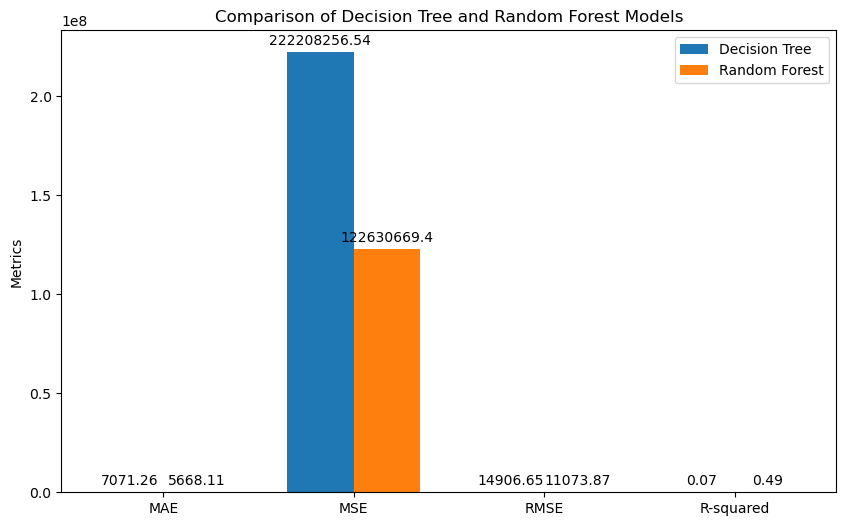

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Define labels and values for the bar chart
labels = ['MAE', 'MSE', 'RMSE', 'R-squared']
values_dt = [mae_dt, mse_dt, rmse_dt, r2_dt]
values_rf = [mae_rf, mse_rf, rmse_rf, r2_rf]

# Set the positions and width for the bars
positions = np.arange(len(labels))
width = 0.35

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(positions - width/2, values_dt, width, label='Decision Tree')
bar2 = ax.bar(positions + width/2, values_rf, width, label='Random Forest')

# Add labels, title, and legend
ax.set_ylabel('Metrics')
ax.set_title('Comparison of Decision Tree and Random Forest Models')
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.legend()

# Add value text on top of the bars
def add_values_on_top(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values_on_top(bar1)
add_values_on_top(bar2)

# Show the plot
plt.show()


Random forest regressor performed better than decision tree in predicting freight cost. The lower the MAE, the better, as it represents the average absolute difference between the predicted and actual values. 